In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import zipfile
import os
import matplotlib.pyplot as plt
import cv2

2024-05-30 13:09:47.577772: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Define paths to the dataset. train to train the CNN and test
train_dir = "/Users/manalalnamani/Desktop/FaceClassification/train"
test_dir = "/Users/manalalnamani/Desktop/FaceClassification/test" 

In [4]:
#The nuymber of images in each path (train and test for happy & sad images)
print(len(os.listdir('/Users/manalalnamani/Desktop/FaceClassification/train/happy')))
print(len(os.listdir('/Users/manalalnamani/Desktop/FaceClassification/train/sad')))
print(len(os.listdir('/Users/manalalnamani/Desktop/FaceClassification/test/happy')))
print(len(os.listdir('/Users/manalalnamani/Desktop/FaceClassification/test/sad')))

82
66
10
8


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator #used for processing images during

In [6]:
# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255, #makesthe pixel values of the images to a range between 0 and 1
)

In [7]:
# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),   # re-sizing the images
    batch_size=32,           # 32 image batch during training the model
    class_mode='binary',     #'binary' for binary classification (happy vs. sad)
    subset='training'        #Specify 'training' for the training set
)


Found 145 images belonging to 2 classes.


In [8]:
#meaning of zero and one 
print(train_data.class_indices)


{'happy': 0, 'sad': 1}


In [13]:
# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,       #makesthe pixel values of the images to a range between 0 and 1
 # Note: Using the same validation split as in the training set
)

In [14]:
# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),  # Resize images to 256x256 pixels
    batch_size=32,           # Use a batch size of 32 images
    class_mode='binary'      # Specify binary classification (happy vs. sad)
)


Found 17 images belonging to 2 classes.


In [15]:
#meaning of zero and one 
print(validation_data.class_indices)

{'happy': 0, 'sad': 1}


In [77]:
test_img_happy = cv2.imread('/Users/manalalnamani/Desktop/FaceClassification/test/happy/19eedf58c6a884eaec995907d3b4fe95.jpg')


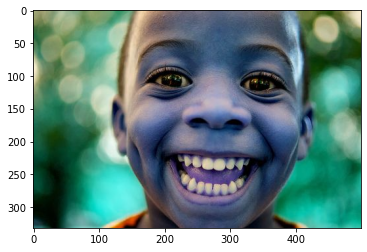

In [78]:
plt.imshow(test_img_happy)

In [12]:
from tensorflow import keras #deep learning library
from keras import Sequential  #creating CNN model layer by layer
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [13]:
# creating CNN model

#1. start sequential model
model = Sequential()  

##2. Convolutional layers: used to extract features from input data

#first convolutional layer with 32 filters and size of 3*3-- relu activation function
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) #max pooling the layer


#second convolutional layer with 64 filters and size of 3*3-- relu activation function
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) #max pooling the layer


#third convolutional layer with 128 filters and size of 3*3-- relu activation function
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) #max pooling the layer

model.add(Flatten()) #the output from the layers is 3D. this makes it 1D


#3. making fully connected layers after to learn complex features from the map created by the convolutional layers
model.add(Dense(128,activation='relu')) #feature reduction- 128 neurons
model.add(Dense(64,activation='relu')) #feature reduction- 64 neurons

#4. output layer
model.add(Dense(1,activation='sigmoid'))  #output layer

In [14]:
# compiling the model and setting the optmizer, loss, and the metrics
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) # binary classification

In [15]:
# tarining the model using training data and validation using validation data
# 30 epochs means the model goes over the training data set 30 times
# history parameter will include metrics for every run
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30


2024-05-23 17:56:14.835423: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - ETA: 0s - loss: 1.8247 - accuracy: 0.5586

2024-05-23 17:56:27.089768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 13s 2s/step - loss: 1.8247 - accuracy: 0.5586 - val_loss: 0.6630 - val_accuracy: 0.5882
Epoch 2/30
5/5 [==============================] - 11s 2s/step - loss: 0.6539 - accuracy: 0.6000 - val_loss: 0.9787 - val_accuracy: 0.3529
Epoch 3/30
5/5 [==============================] - 11s 2s/step - loss: 0.7375 - accuracy: 0.5724 - val_loss: 0.6401 - val_accuracy: 0.5882
Epoch 4/30
5/5 [==============================] - 11s 2s/step - loss: 0.5879 - accuracy: 0.6897 - val_loss: 0.6490 - val_accuracy: 0.7647
Epoch 5/30
5/5 [==============================] - 12s 2s/step - loss: 0.5143 - accuracy: 0.7517 - val_loss: 0.5743 - val_accuracy: 0.8235
Epoch 6/30
5/5 [==============================] - 12s 2s/step - loss: 0.4232 - accuracy: 0.8069 - val_loss: 0.5704 - val_accuracy: 0.7059
Epoch 7/30
5/5 [==============================] - 14s 3s/step - loss: 0.3401 - accuracy: 0.8552 - val_loss: 0.5289 - val_accuracy: 0.7647
Epoch 8/30
5/5 [=============================

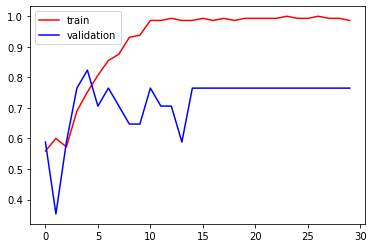

In [17]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

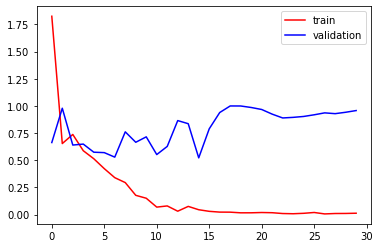

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
#creating a data generator for the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 17 images belonging to 2 classes.


In [20]:
#predict the test data-
# the predict takes batches of test images and will output predictions based on the trained model
predictions = model.predict(test_data)
print(predictions)

2024-05-23 18:02:53.828553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 1s 639ms/step
[[9.9907452e-01]
 [1.4472349e-01]
 [7.3891939e-03]
 [1.2200373e-02]
 [2.7203262e-01]
 [9.6007407e-01]
 [9.6252155e-01]
 [1.8368608e-01]
 [7.0261891e-04]
 [9.9114197e-01]
 [9.7651815e-01]
 [6.3627079e-02]
 [7.6259708e-01]
 [6.0013998e-03]
 [6.4596147e-03]
 [2.3780264e-01]
 [9.9999565e-01]]


In [21]:
len(predictions)

17

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # thereshhold to convert to binary (0 &1)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report 
# recision, recall, F1-score, and support for each class & the overall accuracy.
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[6 4]
 [4 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.43      0.43      0.43         7

    accuracy                           0.53        17
   macro avg       0.51      0.51      0.51        17
weighted avg       0.53      0.53      0.53        17



# Reducing Overfitting by Normalization & Drop Out & reducing conv layers & reducing neurons on fully connected layers

In [29]:
# creating CNN model

#1. start sequential model
model = Sequential()  

##2. Convolutional layers: used to extract features from input data

#first convolutional layer with 32 filters and size of 3*3-- relu activation function
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization()) # to reduce over-fitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) #max pooling the layer


#second convolutional layer with 64 filters and size of 3*3-- relu activation function
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization()) # to reduce over-fitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) #max pooling the layer




model.add(Flatten()) #the output from the layers is 3D. this makes it 1D


#3. making fully connected layers after to learn complex features from the map created by the convolutional layers
model.add(Dense(64,activation='relu')) #feature reduction- 128 neurons
model.add(Dropout(0.10))
model.add(Dense(32,activation='relu')) #feature reduction- 64 neurons
model.add(Dropout(0.20))

#4. output layer
model.add(Dense(1,activation='sigmoid'))  #output layer

In [30]:
# compiling the model and setting the optmizer, loss, and the metrics
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) # binary classification

In [31]:
# tarining the model using training data and validation using validation data
# 30 epochs means the model goes over the training data set 30 times
# history parameter will include metrics for every run
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30


2024-05-30 14:15:42.628120: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - ETA: 0s - loss: 17.5350 - accuracy: 0.5310

2024-05-30 14:15:53.425932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 11s 2s/step - loss: 17.5350 - accuracy: 0.5310 - val_loss: 1.7299 - val_accuracy: 0.5882
Epoch 2/30
5/5 [==============================] - 11s 2s/step - loss: 6.2566 - accuracy: 0.7310 - val_loss: 1.9531 - val_accuracy: 0.5882
Epoch 3/30
5/5 [==============================] - 11s 2s/step - loss: 5.4536 - accuracy: 0.7655 - val_loss: 4.2105 - val_accuracy: 0.6471
Epoch 4/30
5/5 [==============================] - 11s 2s/step - loss: 5.2235 - accuracy: 0.8138 - val_loss: 3.5241 - val_accuracy: 0.6471
Epoch 5/30
5/5 [==============================] - 11s 2s/step - loss: 4.8910 - accuracy: 0.8966 - val_loss: 1.8439 - val_accuracy: 0.6471
Epoch 6/30
5/5 [==============================] - 11s 2s/step - loss: 2.8436 - accuracy: 0.8828 - val_loss: 1.3129 - val_accuracy: 0.7647
Epoch 7/30
5/5 [==============================] - 12s 2s/step - loss: 1.7533 - accuracy: 0.9172 - val_loss: 1.1611 - val_accuracy: 0.8235
Epoch 8/30
5/5 [============================

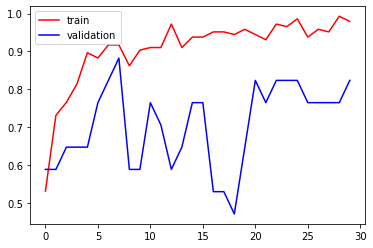

In [32]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

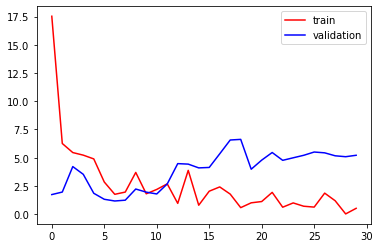

In [33]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [34]:
#creating a data generator for the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 17 images belonging to 2 classes.


In [35]:
#predict the test data-
# the predict takes batches of test images and will output predictions based on the trained model
predictions = model.predict(test_data)
print(predictions)

2024-05-30 14:22:33.528702: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 1s 588ms/step
[[3.6070463e-01]
 [2.4007941e-18]
 [6.8279677e-17]
 [1.4190707e-15]
 [1.6434828e-06]
 [8.6577439e-09]
 [1.3951103e-15]
 [1.3223121e-13]
 [9.9999845e-01]
 [1.0000000e+00]
 [2.5968704e-16]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.4106701e-02]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9880215e-10]]


In [36]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # thereshhold to convert to binary (0 &1)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report 
# recision, recall, F1-score, and support for each class & the overall accuracy.
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[8 2]
 [3 4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.67      0.57      0.62         7

    accuracy                           0.71        17
   macro avg       0.70      0.69      0.69        17
weighted avg       0.70      0.71      0.70        17

